<a href="https://colab.research.google.com/github/osvaldomaguey/sprint8-final-proyect/blob/main/S8_Student_Version_Project_NovaRetail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 7 - Explorando factores de comportamiento en NovaRetail+


NovaRetail+ es una plataforma de comercio electrónico en Latinoamérica con millones de usuarios.

Para el cierre de 2024, el equipo de **Crecimiento y retención** tiene como objetivo responder:

**¿Qué factores del comportamiento del cliente están más fuertemente asociados con el ingreso anual generado?**

> Este proyecto es un análisis **correlacional** (exploratorio).  
> **Correlación ≠ causalidad.**

## Sección 1 - Cargar y explorar el dataset

En esta sección validamos:
- que el dataset cargue correctamente
- tipos de datos
- valores faltantes / rangos generales

Antes de correlacionar, primero entendemos el “terreno”.

In [ ]:
# Importar librerías
import pandas as pd
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Cargar Dataset

In [ ]:
# Cargar el dataset y explorar datos
df = pd.read_csv('/datasets/novaretail_comportamiento_clientes_2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 15000 non-null  object 
 1   edad                       15000 non-null  float64
 2   nivel_ingreso              15000 non-null  float64
 3   visitas_mes                15000 non-null  int64  
 4   compras_mes                15000 non-null  int64  
 5   gasto_publicidad_dirigida  15000 non-null  float64
 6   satisfaccion               15000 non-null  float64
 7   miembro_premium            15000 non-null  int64  
 8   abandono                   15000 non-null  int64  
 9   tipo_dispositivo           15000 non-null  object 
 10  region                     15000 non-null  object 
 11  ingreso_anual              15000 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 1.4+ MB


#### Descripción del conjunto de datos

El dataset contiene las siguientes columnas:

- `id_cliente` — Identificador único del cliente.
- `edad` — Edad del cliente.
- `nivel_ingreso` — Ingreso anual estimado del cliente.
- `visitas_mes` — Número de visitas a la aplicación o sitio web durante el mes.
- `compras_mes` — Número de compras realizadas en el mes.
- `gasto_publicidad_dirigida` — Gasto en anuncios asignado al usuario.
- `satisfaccion` — Calificación de satisfacción del cliente en una escala del 1 al 5.
- `miembro_premium` — Indica si el cliente tiene suscripción premium (1) o no (0).
- `abandono` — Indica si el cliente abandonó la plataforma (1) o no (0).
- `tipo_dispositivo` — Tipo de dispositivo utilizado por el cliente (móvil, escritorio o tablet).
- `region` — Región geográfica del cliente (norte, sur, oeste o este).
- `ingreso_anual` — Ingreso anual generado por el cliente para la empresa.

La métrica principal de análisis es `ingreso_anual`, utilizada para evaluar el impacto económico de los clientes.


In [ ]:
# mostrar las primeras 5 filas
df.head()

,id_cliente,edad,nivel_ingreso,visitas_mes,compras_mes,gasto_publicidad_dirigida,satisfaccion,miembro_premium,abandono,tipo_dispositivo,region,ingreso_anual
0,CL-100000,44.0,28565.77,9,1,31.36,3.9,0,0,móvil,norte,23.22
1,CL-100001,36.0,29673.44,11,3,24.66,3.7,0,0,tablet,sur,93.47
2,CL-100002,46.0,30642.95,9,0,0.00,2.9,0,0,móvil,este,0.00
3,CL-100003,56.0,39468.61,8,0,6.81,3.1,0,0,móvil,este,0.00
4,CL-100004,35.0,22527.83,9,2,26.49,2.3,0,0,móvil,sur,33.76


## Sección 2 - Preparar datos y documentar supuestos

### Exploración y Limpieza

#### Exploración inicial de los datos
El conjunto de datos contiene **15,000 registros** y **12 columnas**, sin valores nulos.

**Variables numéricas**  
Se identifican las siguientes columnas numéricas:
- `edad`
- `nivel_ingreso`
- `visitas_mes`
- `compras_mes`
- `gasto_publicidad_dirigida`
- `satisfaccion`
- `ingreso_anual`

Todas estas variables presentan tipos de datos adecuados.  

**Variables binarias**  
Las siguientes columnas representan variables binarias:
- `miembro_premium`
- `abandono`

Ambas están codificadas como 0 y 1, **no requieren transformación adicional**.

**Variables categóricas**  
Se identifican las siguientes columnas categóricas:
- `id_cliente`
- `tipo_dispositivo`
- `region`

Estas variables están correctamente definidas y no requieren transformación adicional.

In [ ]:
# Corregir el tipo de dato


In [ ]:
# verificar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 15000 non-null  object 
 1   edad                       15000 non-null  float64
 2   nivel_ingreso              15000 non-null  float64
 3   visitas_mes                15000 non-null  int64  
 4   compras_mes                15000 non-null  int64  
 5   gasto_publicidad_dirigida  15000 non-null  float64
 6   satisfaccion               15000 non-null  float64
 7   miembro_premium            15000 non-null  int64  
 8   abandono                   15000 non-null  int64  
 9   tipo_dispositivo           15000 non-null  object 
 10  region                     15000 non-null  object 
 11  ingreso_anual              15000 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 1.4+ MB


#### Explorar variables numéricas

In [ ]:
# Estadísticas descriptivas de variables numéricas
variables_num = df[['edad','nivel_ingreso','visitas_mes','compras_mes','gasto_publicidad_dirigida','satisfaccion','ingreso_anual']]
print(variables_num.describe())

               edad  nivel_ingreso   visitas_mes   compras_mes  \
count  15000.000000   15000.000000  15000.000000  15000.000000   
mean      38.262400   30019.704782     10.029000      1.206467   
std       11.492378    9833.166305      3.158189      1.105284   
min       18.000000    8000.000000      1.000000      0.000000   
25%       30.000000   23127.097500      8.000000      0.000000   
50%       38.000000   30023.745000     10.000000      1.000000   
75%       46.000000   36768.440000     12.000000      2.000000   
max       75.000000   74790.840000     25.000000      8.000000   

       gasto_publicidad_dirigida  satisfaccion  ingreso_anual  
count               15000.000000  15000.000000   15000.000000  
mean                   20.149301      3.603693      36.594180  
std                    10.880724      0.685300      34.484888  
min                     0.000000      1.000000       0.000000  
25%                    12.310000      3.100000       0.000000  
50%                  

Diagnóstico inicial de variables numéricas

- `EDAD`
Hallazgo principal: Distribución simétrica. Media (38.26) ≈ Mediana (38.00) indica equilibrio perfecto en su distribución.

La población esta concentrada en adultos de mediana edad (30-46 años contienen el 50% central).
Dispersión moderada y controlada en el rango 18-75 años.

- `NIVEL_INGRESO`
Hallazgo principal: Distribución simétrica. Media (30,019) ≈ Mediana (30,023) indica un equilibrio en su distribución.

El rango amplio (8,000 - 74,790) indica variabilidad natural en los niveles socioeconómicos, pero sin concentración hacia valores extremos.

- `VISITAS_MES`
Hallazgo principal: Distribución simétrica. Media (10.03) ≈ Mediana (10.00).

Comportamiento de frecuencia homogéneo: la mayoría visita entre 8-12 veces/mes.

Outliers importantes: Máximo de 25 visitas indica clientes ultra-frecuentes (posibles VIPs o casos especiales). Mínimo de 1 indica clientes de prueba o que posiblemente buscaban algo particular que no encontraron en otro lado pero que no son fieles a la marca. Hay que analizar si existe otra variable que explique el comportamiento de estos clientes.

- `COMPRAS_MES`
Hallazgo principal: Distribución simética. Media (1.21) ≈ Mediana (1.00).

Hallazgo crítico: 50% de clientes hace 1 compra o menos al mes, a pesar de visitar frecuentemente, lo que indica una baja tasa de conversión: muchas visitas no resultan en compras. El 25% de clientes no compra nada.

Outliers importantes: el número máximo de compras es 8, lo que indica clientes más fieles o posibles VIP, habría que confirmar el monto de estas compras.

- `GASTO_PUBLICIDAD_DIRIGIDA`
Hallazgo principal: Distribución simétrica. Media (20.15) ≈ Mediana (19.73).

Inversión publicitaria relativamente homogénea en la mayoría de clientes.
Rango amplio (0-75.51) muestra estrategias diferenciadas desde sin inversión hasta campañas agresivas.

- `SATISFACCIÓN`
Hallazgo principal: Distribución simétrica. Media (3.60) ≈ Mediana (3.60).

La variable más homogénea (menor dispersión relativa).
Satisfacción consistentemente positiva: 65%.

Pocos clientes muy insatisfechos (mínimo = 1.0).La baja variabilidad indica que la mayoría de clientes tiene experiencias similares, sin polarización entre muy satisfechos y muy insatisfechos.

- `INGRESO_ANUAL`
Hallazgo principal: Distribució sesgada a la derecha. Media (36.59) > Mediana (30.71).

Hallazgo crítico: 25% de los registros tiene ingreso anual = 0 (probablemente datos faltantes o desempleados). para futuros análisis, es importante tratar esta columna para saber si hay que imputado segmental.

#### Explorar variables binarias

In [ ]:
# Verificar que cada columna tenga únicamente dos valores posibles
print(df['miembro_premium'].value_counts())
print('='*50)
print(df['abandono'].value_counts())

0    12911
1     2089
Name: miembro_premium, dtype: int64
0    12739
1     2261
Name: abandono, dtype: int64


✍️ Diagnóstico inicial de variables binarias

- `miembro_premium` — Solo el 13.92% de los usuarios tienen suscripción premium. Mientras que el 86.08% no tienen dicha suscripción.
- `abandono` — sólo el 15.07% de los usuarios han cancelado su suscripción, mientras que el resto la mantiene (84.03%)

#### Explorar variables categóricas

In [ ]:
# Verificar el número de valores únicos por variable categórica
columnas_cat = ['tipo_dispositivo','region']
for col in columnas_cat:
    print(f"Valores únicos {col:}")
    print(df[col].value_counts(normalize=True))
    print()
    print("="*30)

Valores únicos tipo_dispositivo
móvil         0.654533
escritorio    0.248000
tablet        0.097467
Name: tipo_dispositivo, dtype: float64

Valores únicos region
norte    0.2930
oeste    0.2540
sur      0.2484
este     0.2046
Name: region, dtype: float64



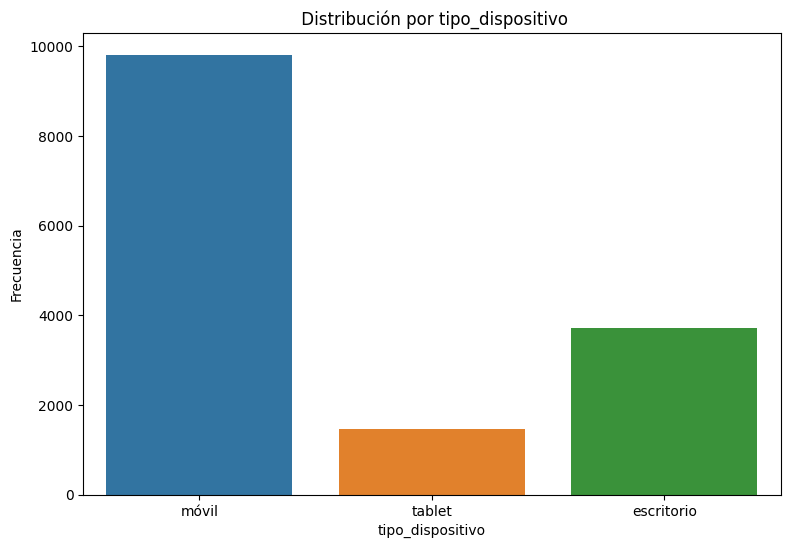

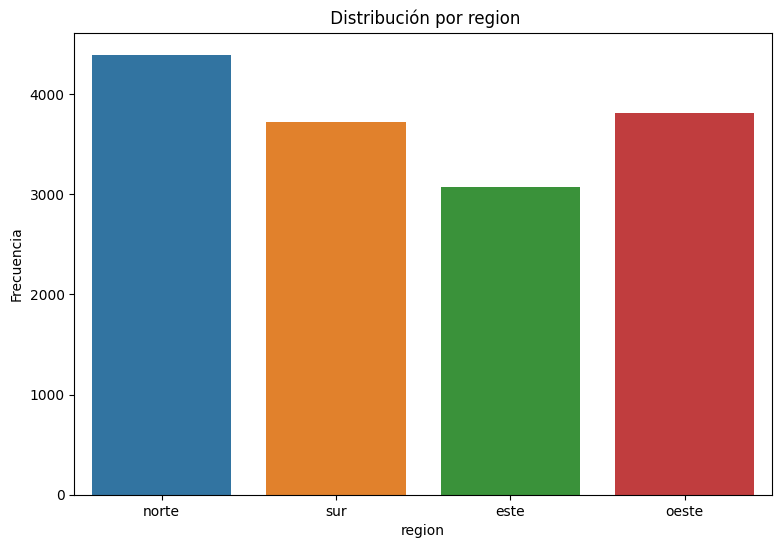

In [ ]:
# Explorar variables categóricas y cómo se distribuyen
for cols in columnas_cat:
    plt.figure(figsize = (9,6))
    sns.countplot(data = df, x= cols)
    plt.xlabel(f"{cols}")
    plt.ylabel('Frecuencia')
    plt.title(f" Distribución por {cols}")
    plt.show()

### Diagnóstico inicial de variables categóricas

- `tipo_dispositivo` — La mayoría de los clientes utilizan el móvil (65.45%), mientras que el 24.8% son usuarios de escritorio y el resto se conectan a través de la tableta (9.75%)
- `region` — La distribución es homogenea entre las diferentes regiones. Las diferencias aunque leves, muestran que la región norte es de donde vienen la mayoría de los clientes (29.3%), seguidos por la región oeste (25.4%), región sur (24.84%) y por último la región sur (20.46%)

Para ambos casos es importante investigar si estas variables se relacionan con alguna otra, antes de sacar conclusiones.

### Supuestos

- El análisis se realiza utilizando **todo el conjunto de datos disponible**.
- Los datos no presentan errores y están correctamente tipificados.
- Se utilizan distintos coeficientes según el tipo de variable:
  - **Pearson** asume relaciones lineales entre variables numéricas.
  - **Spearman** evalúa relaciones monótonas y no requiere normalidad.
  - **Punto biserial** se usa para relaciones numérica–binaria.
  - **Cramér (V)** se usa para asociaciones entre variables categóricas.

**Supuesto central:**  
Este análisis identifica relaciones entre variables o segmentos, pero no prueba causalidad.

## Sección 3 - Visualización de relaciones

Observamos cómo se relacionan las variables numéricas.

### Heatmap

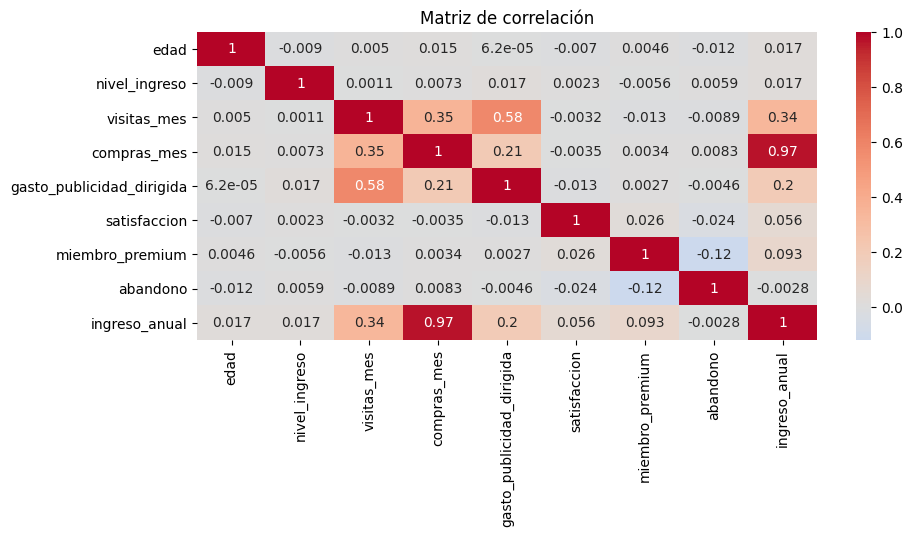

In [ ]:
# Visualizar la matriz de correlación para identificar relaciones
corr = df.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr, annot = True, cmap ='coolwarm', center = 0)
plt.title('Matriz de correlación')
plt.show()

### **Observaciones generales (Heatmap)**  

**- 1. Correlaciones Fuertes Identificadas**
Correlación Perfecta (0.97):

Compras_mes ↔ Ingreso_anual: Esto pudiera ser una colinealidad, que no brinda información adicional, es lógico que el ingreso anual vaya en aumento proporcional a las compras mensuales.

**Correlaciones Moderadas-Fuertes (0.34 - 0.58):**

Visitas_mes ↔ Gasto_publicidad_dirigida (0.58): La inversión publicitaria pareciera estar generando tráfico. Existe una relación positiva moderada-fuerte que justifica la estrategia de marketing digital. Se debe segmentar para saber si esta relación se mantiene con todos los grupos o debe enfocarse en alguno en particular.

Visitas_mes ↔ Compras_mes (0.35): Pareciera haber una tendencia entre el número de visitas y el número de compras. Podría indicar que hay visitantes frecuentes que "navegan pero no compran". Esto quiere decir que existe oportunidad de optimización, se debe hacer segmentación para descubrir que otros factores pudieran estar influyendo en la conducta de compra.

Visitas_mes ↔ Ingreso_anual (0.34): El tráfico impacta directamente en ingresos, pero hay margen de mejora en la monetización por visita, esto pudiera ser una relación repetida, es decir, pudiera estar midiendo lo mismo que la relación de visitas al mes y compras al mes.

**- 2. Ausencia de Correlaciones Significativas**
Variables con independencia relativa:

Satisfacción: Muestra correlaciones extremadamente bajas con todas las demás variables (-0.0035 a 0.056), indicando que la satisfacción del cliente opera de manera independiente a métricas de comportamiento y financieras.

Edad: Sin correlaciones relevantes con ninguna variable, sugiriendo que el comportamiento de compra es homogéneo entre grupos etarios.

Nivel_ingreso: Correlaciones prácticamente nulas, indicando que el poder adquisitivo del cliente no determina su patrón de visitas o compras en nuestro modelo actual.

Miembro-premium y abandono: no tienen influencia alguna en visitar el sitio web o comprar productos.

**Observaciones respecto a `ingreso_anual`**
1. ROI Publicitario Moderado (0.20)

La inversión en publicidad dirigida tiene un impacto positivo pero limitado en ingresos directos.
La publicidad genera visitas (0.58), pero la conversión a ingresos no es proporcional, requiere optimización. Habría que evaluar la calidad de leads generados o analizar si hay otras variables que pudieran estar influyendo.

2. Independencia del Nivel Socioeconómico (0.017)

El nivel de ingreso del cliente NO parece determinar cuánto gasta. Pudiera ser que el producto/servicio tiene appeal transversal en todos los segmentos económicos. Valdría la pena segmentar para confirmar si esto es cierto o no.

3. Tráfico Moderadamente Influyente (0.34)

Las visitas impactan ingresos, pero existe una brecha de conversión significativa. Los clientes visitan frecuentemente (media 10 veces/mes) pero compran poco (media 1.2 veces/mes). Esto pudiera deberse a una fricción en el embudo de conversión, hay que analizar otras variables y hacer experimentos controlados para identificar el o los motivos de esto.

5. Membresía Premium Subutilizada (0.093)

El programa premium tiene una influencia casi nula con ingresos anuales.
Lo que indica que los miembros premium no están gastando más que usuarios regulares.

### Scatterplot general


Con base en los resultados del análisis de correlación, evalúa si es necesario generar un *scatterplot* general.



- **Si decides no incluirlo**:


  - No valdría la pena incluirlo, ya que lo que se necesita es ver las relaciones claves que tuvieron un nivel moderado o fuerte. Hacer uno general metería mucho ruido visual, por lo que mejor se hacen los 6 scatterplot de las correlaciones relavantes.

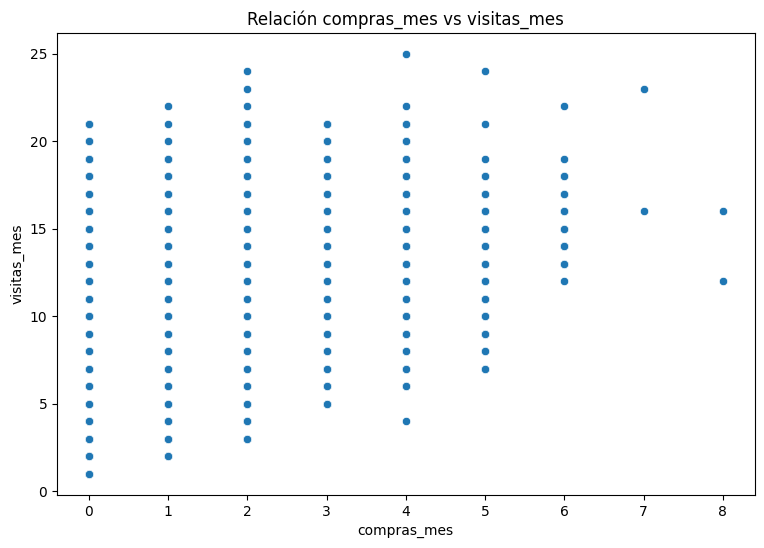

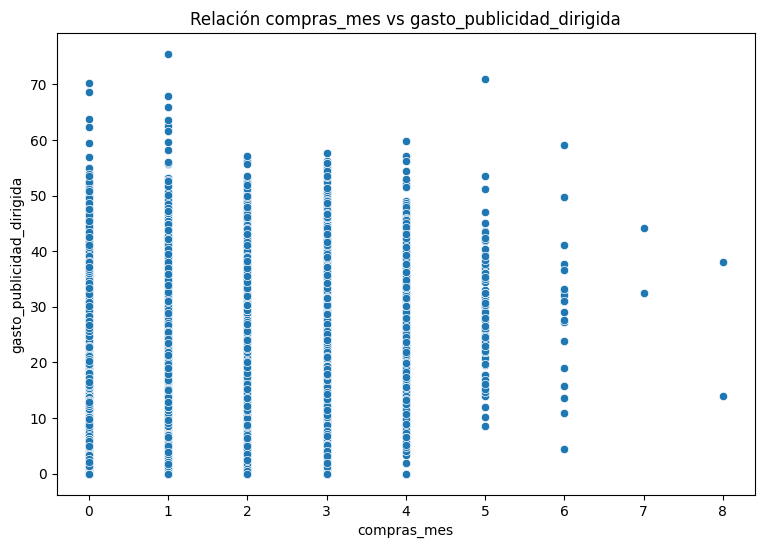

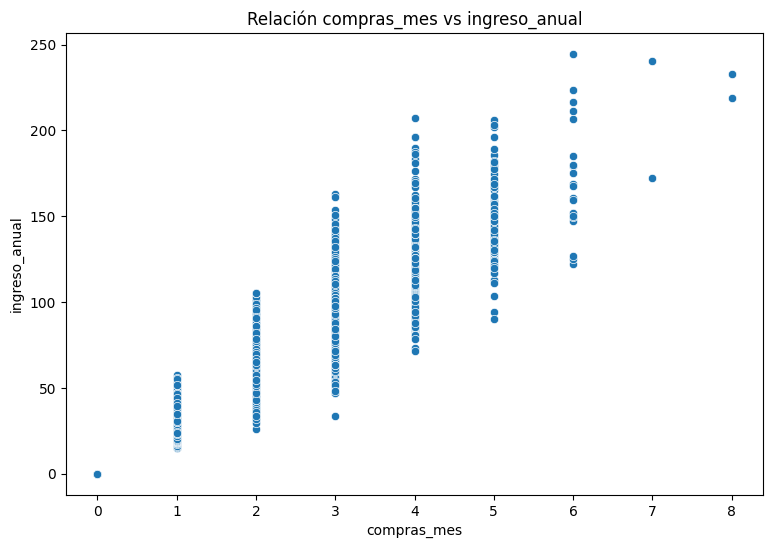

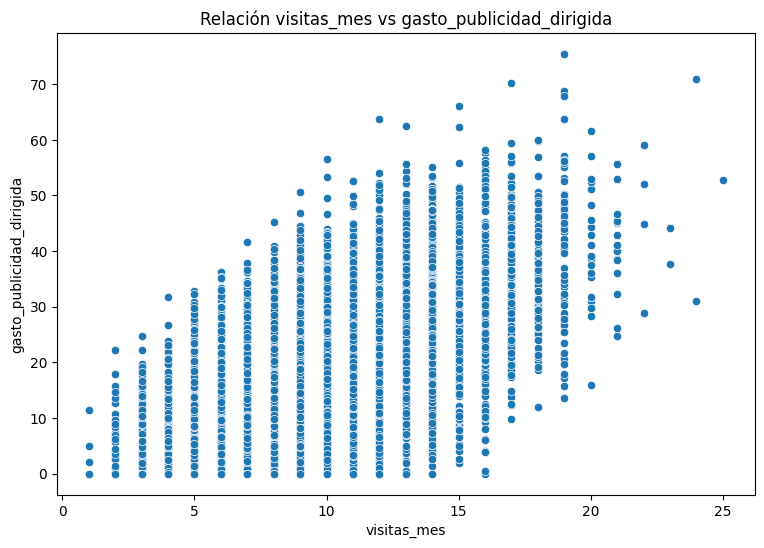

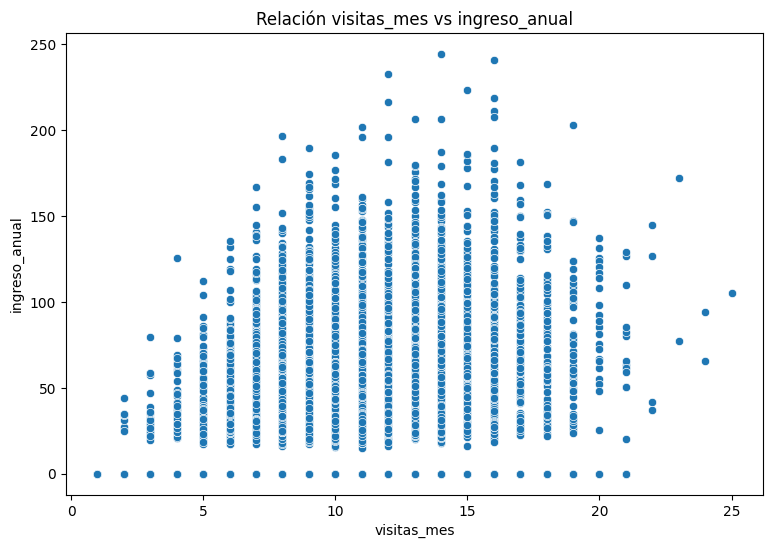

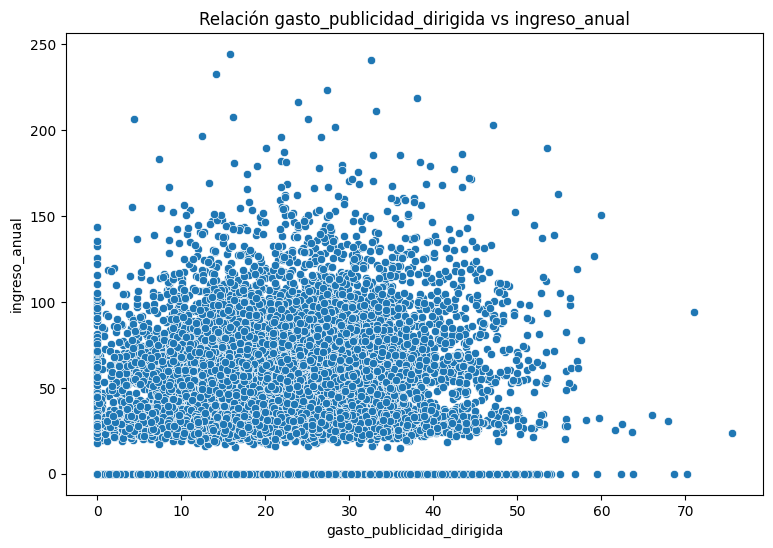

In [ ]:
# Visualizar pares de variables con relaciones moderadas o fuertes
variables_moderadas = ['compras_mes','visitas_mes','gasto_publicidad_dirigida','ingreso_anual']

for i in range(len(variables_moderadas)):
    for j in range(i+1, len(variables_moderadas)):
        x_var = variables_moderadas[i]
        y_var = variables_moderadas[j]
        plt.figure(figsize=(9, 6))
        sns.scatterplot(data=df, x=x_var, y=y_var)
        plt.title(f"Relación {x_var} vs {y_var}")
        plt.xlabel(f"{x_var}")
        plt.ylabel(f"{y_var}")
        plt.show()

### Observaciones iniciales (Scatterplot)

**compras_mes vs visitas_mes (0.35)**
- Dirección es moderadamente positiva, con pocos outliers de compras al mes.
- Se necesita generar más engagement orgánico, lo que posiblemente aumente el número de compras.

**compras_mes vs gasto_publicidad_dirigida (0.21)**
- Dirección es ligeramente positiva, con pocos outliers.  
- Gastar en publicidad tiene un efecto positivo pero débil en las compras generadas al mes.

**compras_mes vs ingreso_anual (0.97)**
- Aunque es la correlación más fuerte, es la más obvia, entre más compras se generen al mes, mayor el ingreso anual para la compañía.
- Necesita segmentarse para descubrir si hay sectores por edad, región, etc. que pudieran ser los que más ingresos generan.

**visitas_mes vs gasto_publicidad_dirigida (0.58)**
- Dirección es moderadamente positiva.
- No se tome esta correlación como algo positivo necesariamente, ya que las compras al mes con respecto a visitas si aumentan pero no de forma proporcional. Aumentar la publicidad para aumentar las visitas totalmente aumentarían las compras, pero esto no necesariamente se traduce en utilidad para la empresa. Se debe analizar otras variables de nuestros clientes que se traducen en mayores compras para generar una mayor utilidad y no solo aumentar el presupuesto de publicidad de forma general.

**visitas_mes vs ingreso_anual (0.34)**
- Dirección es moderadamente positiva. Aunque es casi igual que la de visitas_mes vs compras_mes. Lo que pudiera estar indicando una posible colinealidad.

**gasto_publicidad_dirigida vs ingreso_anual (0.2)**
- Dirección ligeramente positiva.
- Cómo mencione antes, es necesario analizar otras variables ya que el gasto en publicidad pareciera aumentar los ingresos pero no necesariamente se traduce en utilidad para la empresa.

## Sección 4 - Coeficientes de correlación y evidencia numérica

En esta sección, se reportan coeficientes que respaldan los patrones
observados visualmente, utilizando el método adecuado según el tipo
de variables.

### Pearson / Spearman

In [ ]:
# Calcular correlación entre variables relevantes
for i in range(len(variables_moderadas)):
    for j in range(i+1, len(variables_moderadas)):
        corr = df[variables_moderadas[i]].corr(df[variables_moderadas[j]], method= 'pearson')
        print(f"Correlación Pearson entre: \n{variables_moderadas[i]} y {variables_moderadas[j]}: {corr:.4f}\n")

Correlación Pearson entre: 
compras_mes y visitas_mes: 0.3538

Correlación Pearson entre: 
compras_mes y gasto_publicidad_dirigida: 0.2075

Correlación Pearson entre: 
compras_mes y ingreso_anual: 0.9671

Correlación Pearson entre: 
visitas_mes y gasto_publicidad_dirigida: 0.5789

Correlación Pearson entre: 
visitas_mes y ingreso_anual: 0.3371

Correlación Pearson entre: 
gasto_publicidad_dirigida y ingreso_anual: 0.1975



In [ ]:
# Calcular correlación entre variables relevantes
for i in range(len(variables_moderadas)):
    for j in range(i+1, len(variables_moderadas)):
        corr = df[variables_moderadas[i]].corr(df[variables_moderadas[j]], method= 'spearman')
        print(f"Correlación Spearman entre: \n{variables_moderadas[i]} y {variables_moderadas[j]}: {corr:.4f}\n")

Correlación Spearman entre: 
compras_mes y visitas_mes: 0.3329

Correlación Spearman entre: 
compras_mes y gasto_publicidad_dirigida: 0.1925

Correlación Spearman entre: 
compras_mes y ingreso_anual: 0.9675

Correlación Spearman entre: 
visitas_mes y gasto_publicidad_dirigida: 0.5593

Correlación Spearman entre: 
visitas_mes y ingreso_anual: 0.3210

Correlación Spearman entre: 
gasto_publicidad_dirigida y ingreso_anual: 0.1850



### Observaciones de correlación (Pearson/Spearman)

- **compras_mes y visitas_mes** (0.3538/0.3329)
- **compras_mes y gasto_publicidad_dirigida** (0.2075/0.1925)
- **compras_mes y ingreso_anual** (0.9671/0.9675)
- **visitas_mes y gasto_publicidad_dirigida** (0.5789/0.5593)
- **visitas_mes y ingreso_anual** (0.3371/0.3210)
- **gasto_publicidad_dirigida y ingreso_anual** (0.1975/0.1850)

Para todos los casos, existe una ausencia de outliers distorcionantes y se observa que la relación es lineal dado que ambos coeficientes salieron casi iguales. Confirmando lo que se observó en los scatterplot y heatmap.

Algo que quiero reforzar es que la publicidad NO genera compras directas, sino que funciona como driver de tráfico que luego convierte. El verdadero problema parece estar en la conversión, no en la efectividad publicitaria. Se debe analizar si hay fricciones en el funnel de conversión.

Por último, Ingreso anual y compras mes es una variable con colinealidad por lo que se sugiere utilizar solo una de ellas para futuros análisis. Ya que usar ambas puede inflar los datos.

### Punto-biserial

In [ ]:
# Calcular correlación entre variables relevantes
cols_biseriales = ['miembro_premium', 'abandono']
for v_bin in cols_biseriales:
    for v_num in variables_moderadas:
        biserial,_ = pointbiserialr(df[v_bin],df[v_num])
        print(f"Correlación biserial entre: \n{v_bin} y {v_num}: {biserial:.4f}\n")

Correlación biserial entre: 
miembro_premium y compras_mes: 0.0034

Correlación biserial entre: 
miembro_premium y visitas_mes: -0.0127

Correlación biserial entre: 
miembro_premium y gasto_publicidad_dirigida: 0.0027

Correlación biserial entre: 
miembro_premium y ingreso_anual: 0.0931

Correlación biserial entre: 
abandono y compras_mes: 0.0083

Correlación biserial entre: 
abandono y visitas_mes: -0.0089

Correlación biserial entre: 
abandono y gasto_publicidad_dirigida: -0.0046

Correlación biserial entre: 
abandono y ingreso_anual: -0.0028



**Observaciones Punto-biserial**

**miembro_premium y compras_mes** (0.0034)
- Relación es positiva de magnitud baja lo que quiere decir que la suscripción premium no parece influir en las compras generadas al mes
  
**miembro_premium y visitas_mes** (-0.0127)
- Relación es negativa de magnitud baja lo que quiere decir que la suscripción premium no parece influir en las visitas del sitio web

**miembro_premium y gasto_publicidad_dirigida** (0.0027)
- Relación es positiva de magnitud baja lo que quiere decir que el gasto en publicidad no parece influir en tener una suscripción premium

**miembro_premium y ingreso_anual** (0.0931)
- Relación es positiva de magnitud baja lo que quiere decir que la suscripción premium no parece influir en el ingreso anual de la compañía

**abandono y compras_mes** (0.0083)
- Relación es positiva de magnitud baja lo que quiere decir que el abandono de la página no parece influir en las compras del mes.  

**abandono y visitas_mes** (-0.0089)
- Relación es negativa de magnitud baja lo que quiere decir que el abandono de la página no parece influir en las visitas al sitio web.

**abandono y gasto_publicidad_dirigida** (-0.0046)
- Relación es negativa de magnitud baja lo que quiere decir que el gasto en publicidad no parece influir en los abandonos del sitio web.

**abandono y ingreso_anual** (-0.0028)
- Relación es negativa de magnitud baja lo que quiere decir que el abandono de la página no parece influir en los ingresos anuales de la compañía.


### V de Cramér

In [ ]:
# Función para calcular V de Cramér
col_categoricas = ['tipo_dispositivo', 'region']
def cramers_v (var1, var2):
    tabla = pd.crosstab(var1, var2)
    chi2, p, dof, expected = chi2_contingency(tabla)
    n = tabla.sum().sum()
    cramers_v = np.sqrt(chi2/(n*(min(tabla.shape)-1)))
    return cramers_v

In [ ]:
# Aplicar V de Cramér en variables relevantes
for i in range(len(col_categoricas)):
    for j in range(i+1, len(col_categoricas)):
        var1, var2 = col_categoricas[i], col_categoricas[j]
        v_cramer = cramers_v(df[var1], df[var2])
        print(f"V de Cramér entre {var1} y {var2}: \n{v_cramer:.4f}")

V de Cramér entre tipo_dispositivo y region: 
0.0124


### Observaciones V de Cramér

**No existe asociación entre tipo de dispositivo y región. Esto quiere decir que los usuarios usan dispositivos de manera uniforme en todas las regiones. No hay preferencias regionales por tipo de dispositivo. Por lo que las estrategias de marketing pueden ser consistentes entre regiones y no necesitan adaptar la experiencia web/móvil por región específica**


## Sección 5 - Interpretación de resultados para el negocio

Cada hallazgo  debe incluir:
1) Evidencia visual (si aplica)
2) Evidencia numérica  
3) Interpretación (no causal)  
4) No podemos afirmar
5) Implicación de negocio

---

### Hallazgo 1 — Tipo de dispositivo no tiene impacto en los ingresos anuales

**Evidencia visual:**  
Grafico "Distribución de tipo_dispostivo"

**Evidencia numérica:**
V de Cramer (tipo_dispositivo vs region): 0.0124
Distribución: Móvil 65%, Escritorio 25%, Tablet 10%
Pearson visitas_mes vs ingresos_anuales: 0.3371

**Interpretación**  
Lo usuarios tienden a usar muchimo más el móvil (65%) para ingresar al sitio, en comparación con otros dispositivos (escritorio 25%, tableta 10%), para visitar el sitio web.  Junto con la correlación de Pearson entre el visitas al mes y el ingreso anual indican que el tipo de dispositivo no parece tener influencia en el ingreso anual.

**No podemos afirmar**  
Que la mayoría de las compras se deben a que es más fácil o preferirle hacerlo desde el móvil

**Implicación de negocio**  
- No hay preferencias regionales por tipo de dispositivo
- Los usuarios usan dispositivos de manera uniforme en todas las regiones
- Las estrategias de marketing digital pueden ser consistentes entre regiones
- No hay necesidad de adaptar la experiencia web/móvil/tablet por región

### Hallazgo 2 — Oportunidad perdida: Membresía Premium no genera valor diferencial

**Evidencia visual:**
N/A

**Evidencia numérica:**
Correlación biserial
miembro_premium y compras_mes: 0.0034
miembro_premium y visitas_mes: -0.0127
miembro_premium y gasto_publicidad_dirigida: 0.0027
miembro_premium y ingreso_anual: 0.0931

**Interpretación**  
La influencia de la membresía premium es casi nula en la conducta de compra de los usuarios. La membresía premium muestra correlaciones extremadamente débiles con todas las
variables de comportamiento. Incluso la correlación más alta (ingreso anual: 0.0931)
indica una influencia mínima, sugiriendo que el estatus premium no diferencia
significativamente el comportamiento de compra de los usuarios.

**No podemos afirmar**  
- Que se debe elimitar dicha membresía sin investigación adicional.
- Que los miembros premium no valoran otros beneficios no medidos


**Implicación de negocio**  
- Esto pudiera ser señal de que la membresía premium no es atractiva para nuestros clientes.
- Considerar reestructurar niveles de membresía basados en datos de comportamiento
- Revisarlos beneficios actuales de la membresía premium
- Investigar qué valoran realmente los clientes mediante encuestas/focus groups
- Evaluar ROI de recursos invertidos en programa premium actual

### Hallazgo 3 — Alerta ROI: ¿Más publicidad = Más ingresos?

**Evidencia visual:**
Heatmap: Matriz de correlación

**Evidencia numérica:**
Correlación Pearson
gasto_publicidad_dirigida y visitas_mes: 0.58 (moderada positiva)
gasto_publicidad_dirigida y compras_mes: 0.21 (débil positiva)
gasto_publicidad_dirigida y ingreso_anual: 0.20 (débil positiva)

Correlaciones adicionales
visitas_mes y compras_mes: 0.35 (moderada positiva)
visitas_mes y ingreso_anual: 0.34 (moderada positiva)
                                               
**Interpretación**  
El gasto en publicidad dirigida muestra una correlación moderada con visitas (0.58), pero correlaciones débiles con compras (0.21) e ingresos (0.20). Esta discrepancia sugiere que aunque la publicidad atrae tráfico, no se traduce proporcionalmente en conversiones o ingresos. La correlación visitas-compras (0.35) indica que el problema no está en la conversión, sino en la calidad del tráfico generado.

**No podemos afirmar**  
- Que aumentar la publicidad aumentarán los ingresos anuales de forma proporcional.
- Que existe relación causal entre gasto publicitario e ingresos
- Que si aumentan las visitas al sitio, habrá más compras y mayor el ingreso anual.

**Implicación de negocio**  
- Aumentar forma indiscriminada el gasto en publicidad pudiera traer más ingresos pero no necesariamente es mayor utilidad.
- Implementar pruebas A/B para medir ROI real de campañas publicitarias
• Analizar calidad del tráfico: ¿las visitas generadas convierten?
• Optimizar segmentación publicitaria para mejorar tasa de conversión
• Establecer métricas de eficiencia: costo por conversión vs costo por visita
• Considerar rebalancear presupuesto hacia canales con mejor ROI comprobado

## Sección 6 - Limitaciones y próximos pasos

### **Limitaciones metodológicas**

**Análisis correlacional:**
- El estudio se basa únicamente en correlaciones, no establece causalidad
- No se controlaron variables confusoras que podrían influir en los resultados
- Falta análisis de regresión múltiple para aislar efectos individuales

**Datos temporales:**
- Análisis de corte transversal, no captura tendencias temporales
- No se consideraron estacionalidades o ciclos de comportamiento
- Falta información sobre duración de membresías premium

**Variables no medidas:**

- Calidad de la experiencia de usuario por dispositivo
- Efectividad de diferentes canales publicitarios
- Factores demográficos detallados

### **Próximos pasos**

**Investigación adicional requerida**

**Análisis causal:**
- Implementar experimentos A/B para validar relaciones causales
- Realizar análisis de regresión múltiple incluyendo variables de control
- Estudios longitudinales para capturar efectos temporales
- Investigación cualitativa:

**Focus groups con miembros premium para entender valor percibido**
- Encuestas de satisfacción por tipo de dispositivo
- Análisis de journey del cliente por canal de adquisición

**Acciones inmediatas recomendadas**
Optimización publicitaria (Prioridad Alta):
- Auditoría completa de campañas publicitarias actuales
- Implementar tracking de conversiones por canal
- Establecer métricas de ROI por segmento de audiencia

**Reestructuración de membresía**
- Benchmarking de programas premium en la industria
- Análisis costo-beneficio del programa actual
- Diseño de nuevos niveles de membresía basados en datos

**Métricas de seguimiento sugeridas (KPIs a implementar):**
- Costo por adquisición (CPA) por canal publicitario
- Lifetime Value (LTV) de miembros premium vs regulares
- Tasa de conversión por dispositivo
- ROI publicitario por segmento demográfico